In [624]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [625]:
#reading the dataset
cols=['age','workclass','fnlwgt','education','education num','marital-status','job','relationship','race','sex','capital gain','capital loss','hours-per-week','country','income']
df=pd.read_csv('adult.data',names=cols)

In [626]:
df.sample(10)

,age,workclass,fnlwgt,education,education num,marital-status,job,relationship,race,sex,capital gain,capital loss,hours-per-week,country,income
15901,19,Private,271118,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,28,United-States,<=50K
19377,28,Private,196690,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
22141,39,Private,202937,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,>50K
29720,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
817,56,Private,186556,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,>50K
4428,58,Private,218281,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,Mexico,<=50K
10116,51,Private,161691,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
26619,27,Private,100168,7th-8th,4,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
9617,60,Private,128367,Some-college,10,Divorced,Prof-specialty,Unmarried,White,Male,3325,0,42,United-States,<=50K
5664,33,Private,192644,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,35,Puerto-Rico,<=50K


In [627]:
#we can see that few columns have ? 
#we will need to either replace them or delete them all together

In [628]:
#firstly,we'll check for null values

In [629]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education num     0
marital-status    0
job               0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours-per-week    0
country           0
income            0
dtype: int64

In [630]:
#there are no null values

In [631]:
#dealing with the ?
#we'll check all the columns for ?

In [632]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num',
       'marital-status', 'job', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [633]:
for n in cols:
    if ' ?' in df[n].unique():
        print(n)

workclass
job
country


In [634]:
#we can see that workclass, job and country have ? in them

In [635]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [636]:
df['job'].value_counts()

job
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [637]:
df['country'].value_counts()

country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                         

In [638]:
#we can see that the count of ? is huge in all the three columns
#we cannot remove the rows containing ?
#we will replace it with the mode for each column

In [639]:
df['workclass'].mode()

0     Private
Name: workclass, dtype: object

In [640]:
df['country'].mode()

0     United-States
Name: country, dtype: object

In [641]:
df['job'].mode()

0     Prof-specialty
Name: job, dtype: object

In [642]:
df['workclass']=df['workclass'].replace(' ?','Private')

In [643]:
df['job']=df['job'].replace(' ?','Prof-speciality')

In [644]:
df['country']=df['country'].replace(' ?','United-States')

In [645]:
#checking if any ? left

In [646]:
for n in cols:
    if ' ?' in df[n].unique():
        print(n)

In [647]:
#no more columns with ?

In [648]:
#looking at the education column

In [649]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [650]:
#we can club a few unique values together

In [651]:
df['education']=df['education'].replace((' 11th',' 12th',' 9th',' 10th',' HS-grad','HS-grad'), 'high School')
df['education']=df['education'].replace((' 5th-6th',' 7th-8th'),'middle School')
df['education']=df['education'].replace((' 1st-4th'),'preschool')
df['education']=df['education'].replace((' Assoc-acdm',' Assoc-voc',' Prof-school',' Some-college'),'higer')
df['education']=df['education'].replace((' Bachelors'),'undergrad')
df['education']=df['education'].replace((' Masters'),'postgrad')
df['education']=df['education'].replace((' Doctorate'),'doc')

In [652]:
df['education'].unique()

array(['undergrad', 'high School', 'postgrad', 'higer', 'middle School',
       'doc', 'preschool', ' Preschool'], dtype=object)

In [653]:
df['education'].value_counts()

education
high School      13556
higer            10316
undergrad         5355
postgrad          1723
middle School      979
doc                413
preschool          168
 Preschool          51
Name: count, dtype: int64

In [654]:
#looking at the marital status column

In [655]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [656]:
df['marital-status']=df['marital-status'].replace((' Never-married'),'not married')
df['marital-status']=df['marital-status'].replace((' Married-civ-spouse',' Married-AF-spouse'),'married')
df['marital-status']=df['marital-status'].replace((' Divorced',' Married-spouse-absent',' Separated',' Widowed'),'other')

In [657]:
df['marital-status'].unique()

array(['not married', 'married', 'other'], dtype=object)

In [658]:
df['marital-status'].value_counts()

marital-status
married        14999
not married    10683
other           6879
Name: count, dtype: int64

In [659]:
#looking at the income column
#we can replace <=50K with 0 and >50K with 1 

In [660]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [661]:
df['income']=df['income'].replace(' <=50K','0')
df['income']=df['income'].replace(' >50K','1')

In [662]:
df['income'].unique()

array(['0', '1'], dtype=object)

In [663]:
df['income']=df['income'].astype(int)

In [664]:
df.corr(numeric_only=True)

,age,fnlwgt,education num,capital gain,capital loss,hours-per-week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<Axes: >

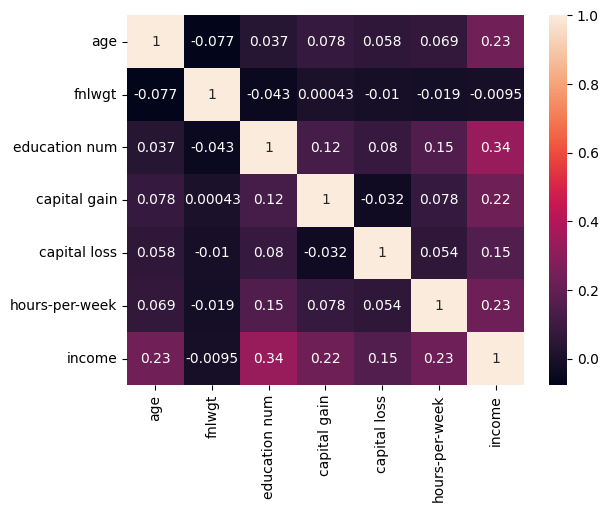

In [665]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [666]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num',
       'marital-status', 'job', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [667]:
df.corr(numeric_only=True)['income'].sort_values()

fnlwgt           -0.009463
capital loss      0.150526
capital gain      0.223329
hours-per-week    0.229689
age               0.234037
education num     0.335154
income            1.000000
Name: income, dtype: float64

In [668]:
#we can see there is very low correlation among all the columns

In [669]:
#visual representation

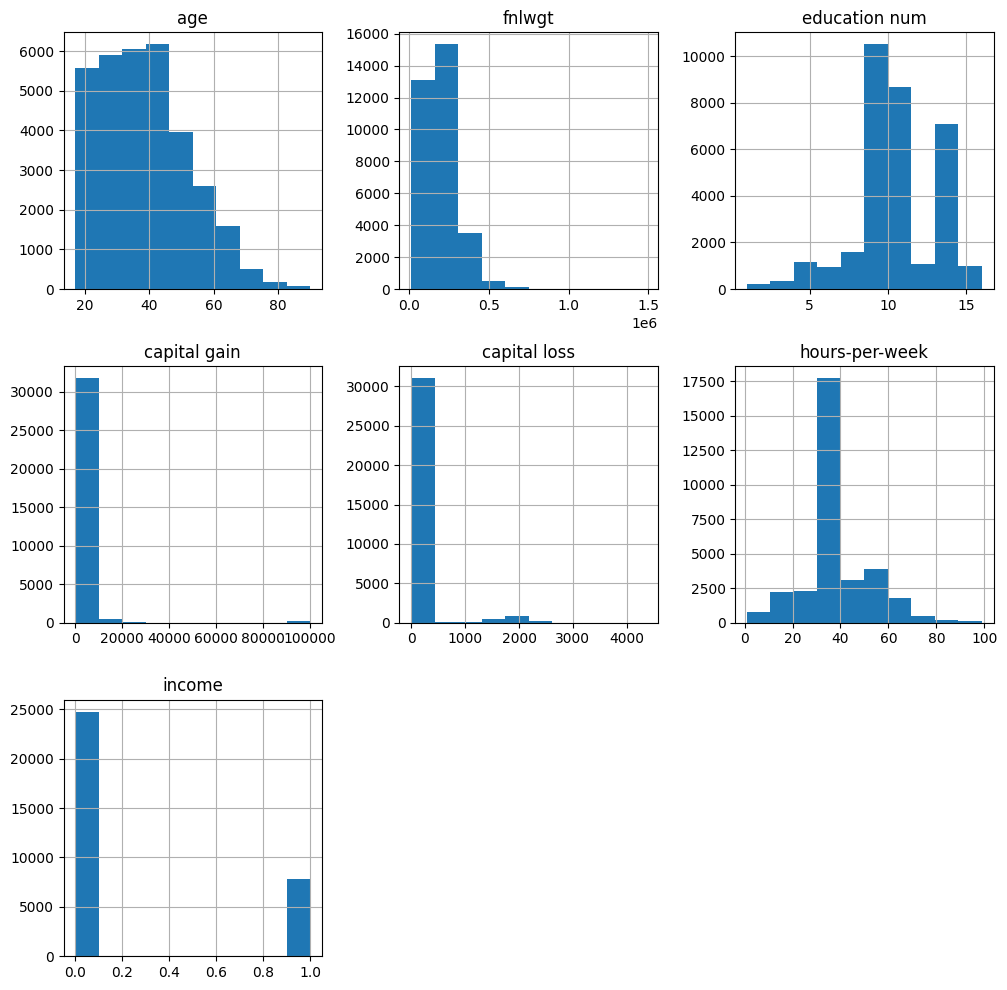

In [670]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

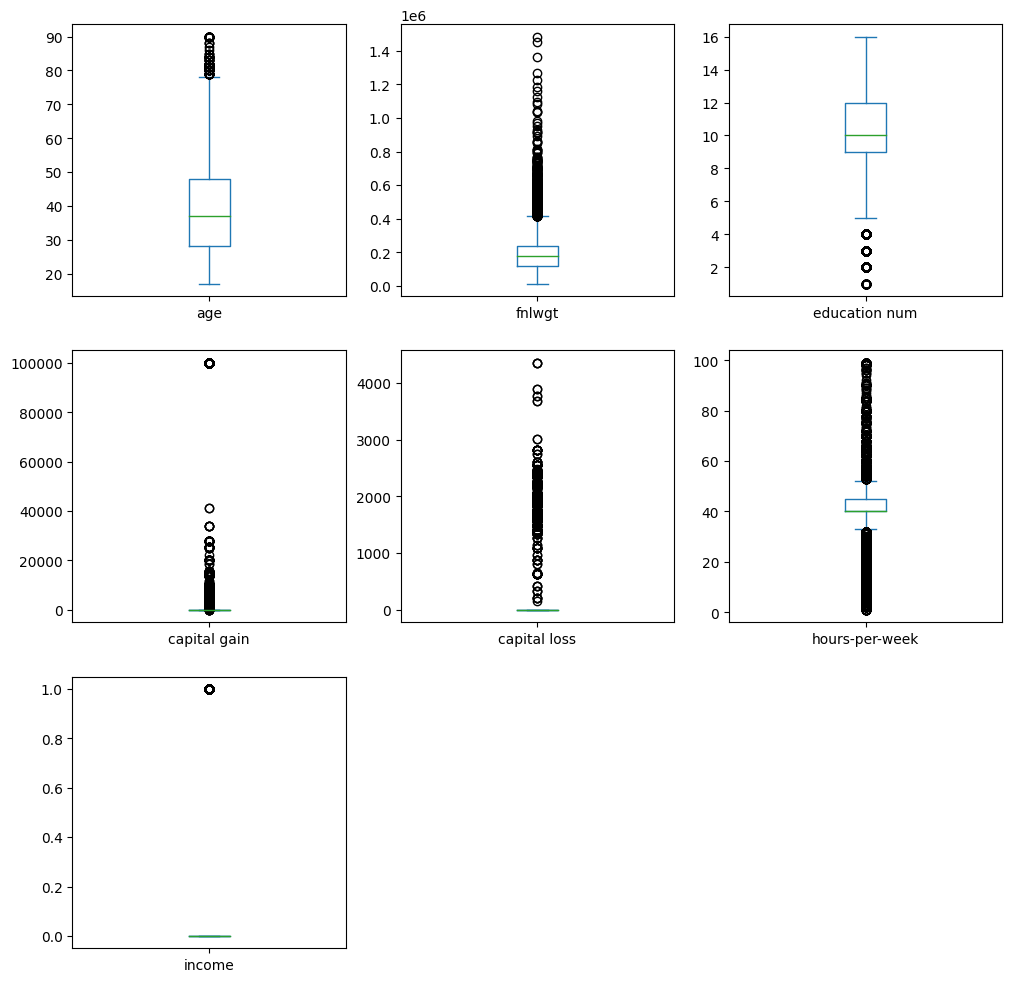

In [671]:
df.plot(kind='box',sharex=False,figsize=(12,12),layout=(3,3),subplots=True);

<Axes: xlabel='income', ylabel='count'>

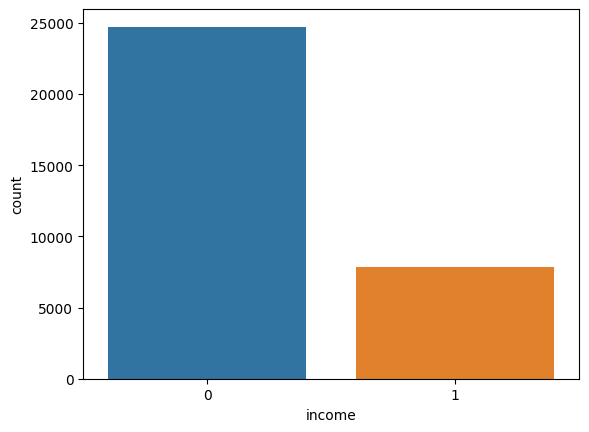

In [672]:
sns.countplot(data=df,x='income')

<Axes: xlabel='income', ylabel='count'>

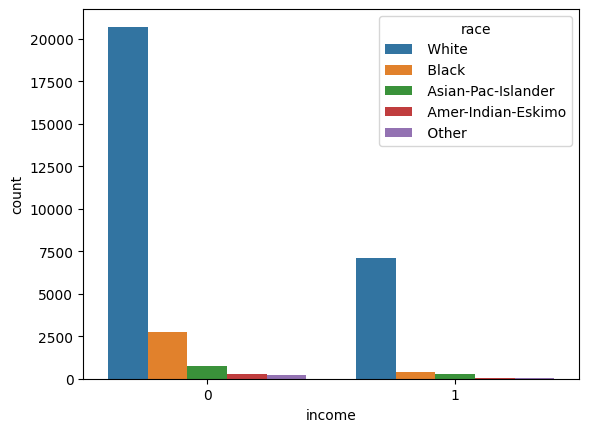

In [673]:
sns.countplot(data=df,x='income',hue='race')

<Axes: xlabel='income', ylabel='count'>

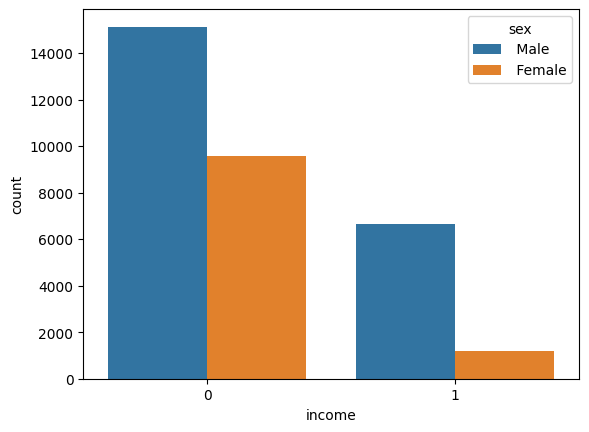

In [674]:
sns.countplot(data=df,x='income',hue='sex')

<Axes: xlabel='income', ylabel='count'>

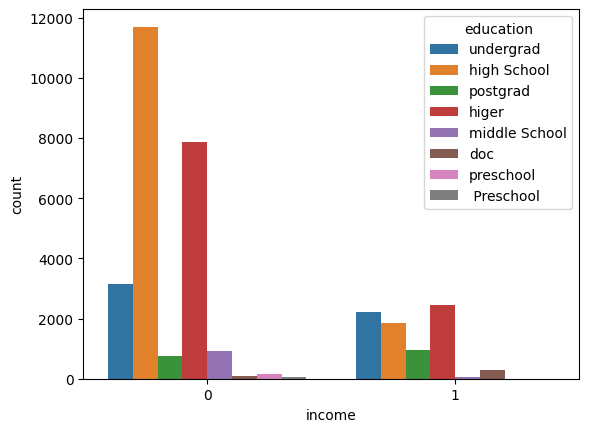

In [675]:
sns.countplot(data=df,x='income',hue='education')

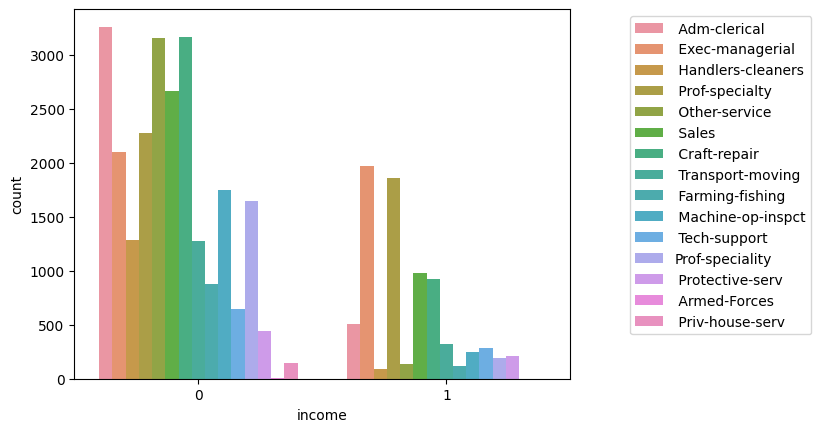

In [676]:
sns.countplot(data=df,x='income',hue='job')
plt.legend(bbox_to_anchor=(1.5,1))

In [677]:
#splitting the data and training the model

In [678]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [679]:
le=LabelEncoder()

In [680]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num',
       'marital-status', 'job', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [681]:
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['marital-status']=le.fit_transform(df['marital-status'])
df['job']=le.fit_transform(df['job'])
df['relationship']=le.fit_transform(df['relationship'])
df['sex']=le.fit_transform(df['sex'])
df['race']=le.fit_transform(df['race'])
df['country']=le.fit_transform(df['country'])

In [682]:
df.sample(10)

,age,workclass,fnlwgt,education,education num,marital-status,job,relationship,race,sex,capital gain,capital loss,hours-per-week,country,income
712,36,3,271767,7,13,2,9,1,4,1,0,0,40,41,0
26328,28,3,145284,3,9,2,13,1,4,1,0,0,70,38,0
21517,31,3,288566,7,13,0,12,0,4,1,0,0,43,38,1
8211,73,3,301210,6,2,0,13,0,4,1,0,1735,20,38,0
31652,40,3,132222,2,10,0,6,0,4,1,4386,0,50,38,1
6221,34,3,316470,2,10,1,0,1,4,1,0,0,40,38,0
6991,57,1,174132,5,14,0,9,5,2,0,0,1977,40,38,1
15301,39,3,164712,2,10,1,13,4,4,1,0,0,40,38,0
1999,51,6,196504,3,9,2,2,4,4,1,0,0,38,38,0
1090,41,0,133060,2,12,0,9,0,4,1,0,0,40,38,1


In [683]:
scaler=StandardScaler()

In [684]:
X=df.drop('income',axis=1)
y=df['income']

In [685]:
from sklearn.model_selection import train_test_split

In [686]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [687]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

In [688]:
accuracy_list=[]

In [689]:
def model(model,data,accuracy_list):
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    print('\n')
    accuracy=accuracy_score(y_test,y_pred).round(2)
    accuracy_list.append(accuracy)
    print(f"The accuracy is {accuracy}")
    print('\n')
    
    confusion_matrix(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    df_cm=pd.DataFrame(cm,index=[i for i in ['0','1']],
                      columns=[i for i in [['Predicted 0','Predicted 1']]])
    plt.figure(figsize=(7,4))
    sns.heatmap(data=df_cm,annot=True,fmt='g',cmap='Pastel2')


              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7436
           1       0.66      0.31      0.42      2333

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



The accuracy is 0.8




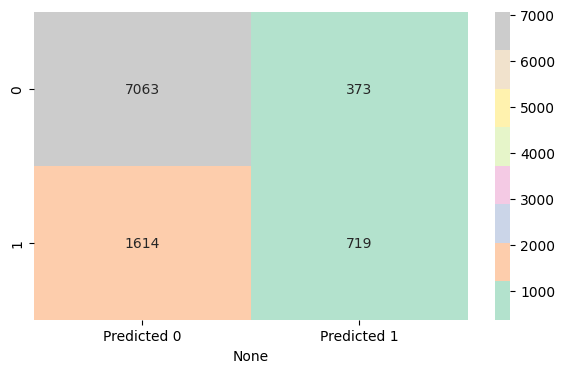

In [690]:
#Logistic Regression
lg=LogisticRegression()
model(lg,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7436
           1       0.68      0.32      0.44      2333

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.80      0.77      9769



The accuracy is 0.8




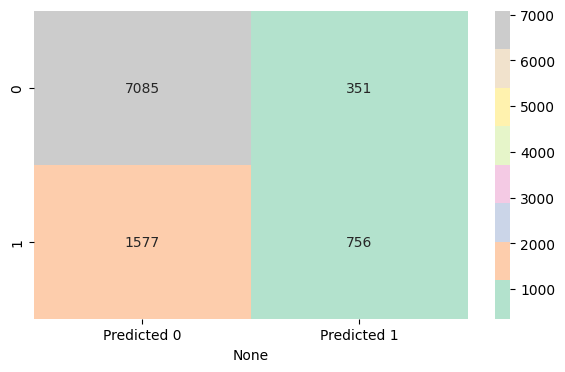

In [691]:
#Gaussian NB
gb=GaussianNB()
model(gb,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7436
           1       0.60      0.64      0.62      2333

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.81      9769



The accuracy is 0.81




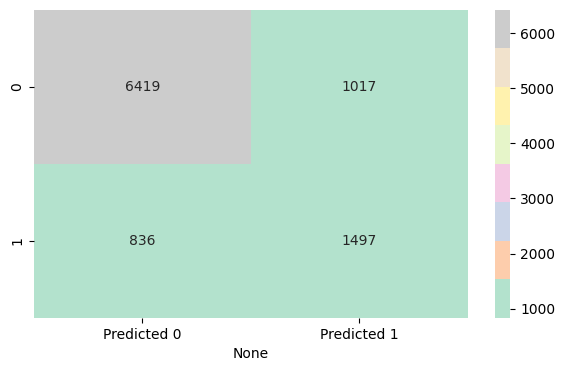

In [692]:
#Decision Tree
dt=DecisionTreeClassifier()
model(dt,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7436
           1       0.56      0.32      0.41      2333

    accuracy                           0.78      9769
   macro avg       0.69      0.62      0.64      9769
weighted avg       0.75      0.78      0.76      9769



The accuracy is 0.78




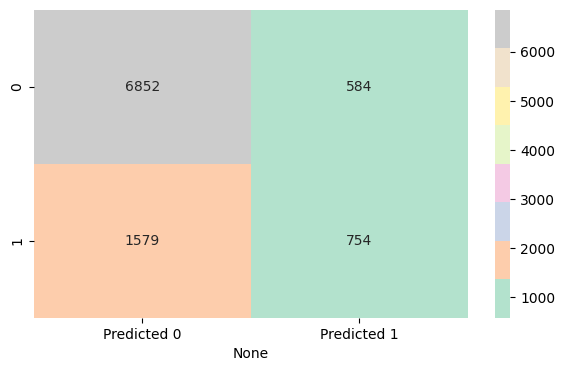

In [693]:
#knn
knn=KNeighborsClassifier()
model(knn,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7436
           1       0.74      0.64      0.69      2333

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



The accuracy is 0.86




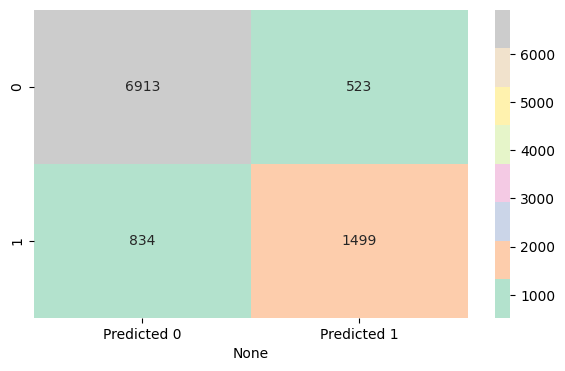

In [694]:
#random forest
rf=RandomForestClassifier()
model(rf,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7436
           1       0.76      0.63      0.69      2333

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



The accuracy is 0.86




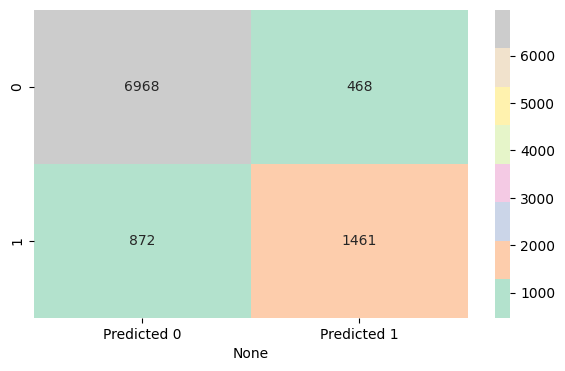

In [695]:
#Ada boost
ad=AdaBoostClassifier()
model(ad,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7436
           1       0.78      0.63      0.70      2333

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



The accuracy is 0.87




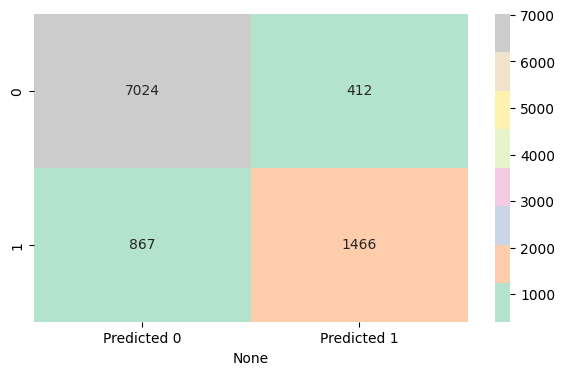

In [696]:
#Gradient Boost
gb=GradientBoostingClassifier()
model(gb,df,accuracy_list)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7436
           1       0.99      0.15      0.26      2333

    accuracy                           0.80      9769
   macro avg       0.89      0.57      0.57      9769
weighted avg       0.84      0.80      0.73      9769



The accuracy is 0.8




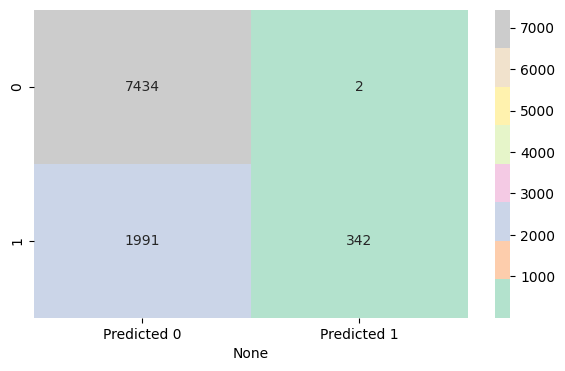

In [697]:
#Support Vector
svm=SVC()
model(svm,df,accuracy_list)

In [698]:
accuracies={'Logistic Regression':accuracy_list[0],
           'Gaussian NB':accuracy_list[1],
           'Decision Tree':accuracy_list[2],
           'KNN':accuracy_list[3],
           'Random Forest':accuracy_list[4],
           'AdaBoost':accuracy_list[5],
           'Gradient Boost':accuracy_list[6],
           'Support Vector':accuracy_list[7]}

In [699]:
acc=pd.DataFrame(accuracies,index=[0])

In [700]:
acc

,Logistic Regression,Gaussian NB,Decision Tree,KNN,Random Forest,AdaBoost,Gradient Boost,Support Vector
0,0.8,0.8,0.81,0.78,0.86,0.86,0.87,0.8


In [703]:
#gradient boost performs the best so we will use it in our final model

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7436
           1       0.78      0.63      0.70      2333

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.86      0.87      0.86      9769



The accuracy is 0.87




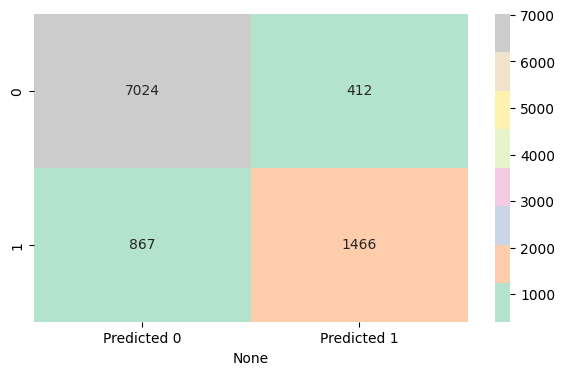

In [709]:
final_model=GradientBoostingClassifier()
model(final_model,df,accuracy_list)

In [710]:
#dumping the model

In [711]:
import joblib
joblib.dump(final_model,'final_model.pkl')
new_columns=df.columns
joblib.dump(new_columns,'new_columns.pkl')

['new_columns.pkl']

In [712]:
#loading the model

In [713]:
loaded_model=joblib.load('final_model.pkl')
new_columns=joblib.load('new_columns.pkl')

In [714]:
loaded_model.predict([[36,3,271767,7,13,2,9,1,4,1,0,0,40,41]])

array([0])

In [715]:
loaded_model.predict([[57,1,174132,5,14,0,9,5,2,0,0,1977,40,38]])

array([1])